In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.rcParams['figure.figsize'] = 12, 9
plt.rcParams['font.size'] = 16


In [6]:
df = pd.read_csv(
    'data/Z13_080_00.txt',
    names=['energy', 'wavelength', 'counts'],
    header=None,
    comment='#',
)

Text(0,0.5,'counts')

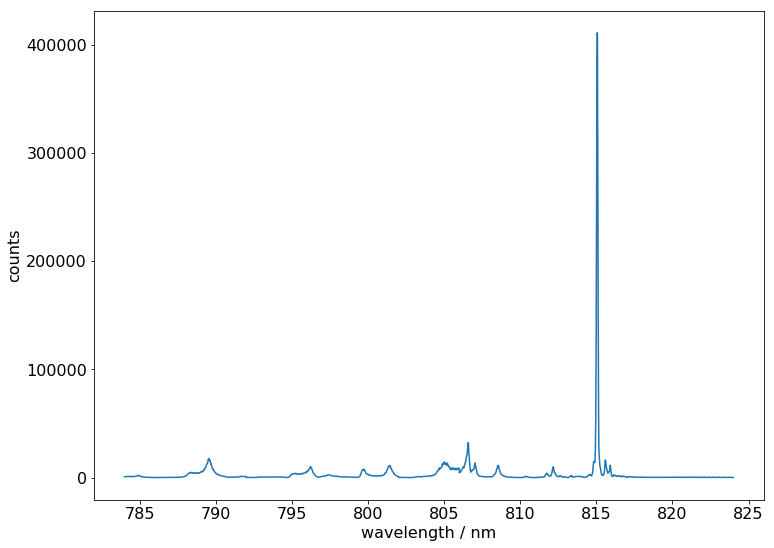

In [7]:
plt.plot(df['wavelength'], df['counts'])
plt.xlabel('wavelength / nm')
plt.ylabel('counts')

# Lets find some peaks

left_thresholds right_thresholds prominences left_bases right_bases


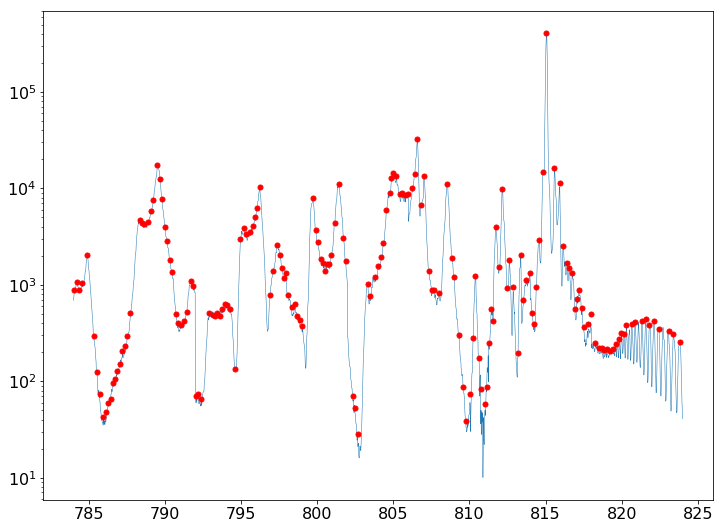

In [97]:
from scipy.signal import find_peaks

indices, properties = find_peaks(
    df['counts'].values,
    threshold=3,
    prominence=0.1,
    distance=10,
)


plt.plot(df['wavelength'], df['counts'].rolling(3, center=True).median().values, lw=0.5)
plt.plot(df['wavelength'].iloc[indices], df['counts'].iloc[indices], 'ro', ms=5)
plt.yscale('log')

print(*properties.keys())

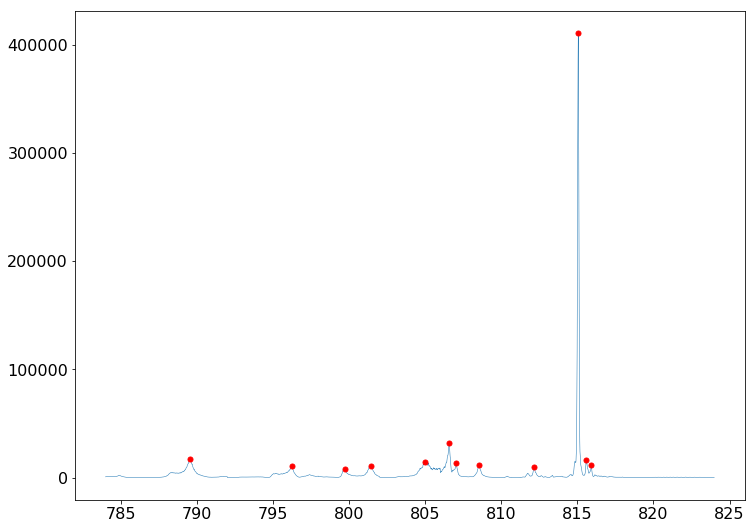

In [118]:
mask = (
    (np.log10(properties['prominences']) > 3.5)
)

plt.figure()
plt.plot(df['wavelength'], df['counts'], lw=0.5)
plt.plot(df['wavelength'].iloc[indices[mask]], df['counts'].iloc[indices[mask]], 'ro', ms=5)


In [104]:
np.sum(mask)

23

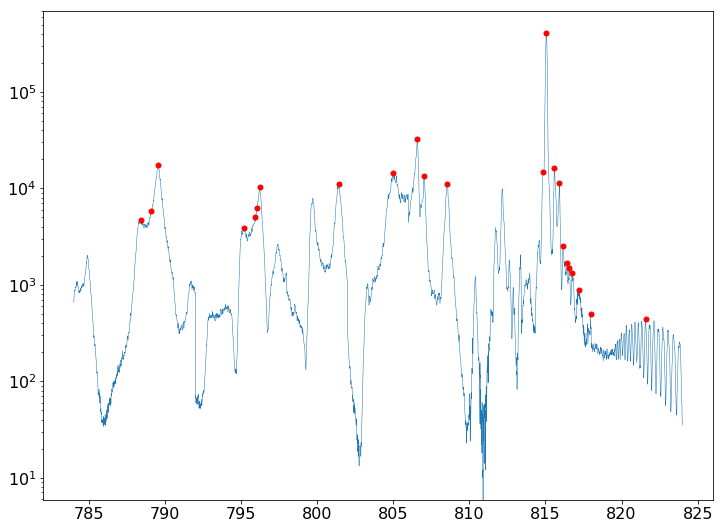